# Exploratory Data Analysis and Machine Learning Classification on Campus Recruitment


Hello. I conducted an EDA and ML study on Campus Recruitment Dataset in this notebook. I performed Data Analysis on the dataset using visualization tools. Next, I tried using the data to predict whether a candidate would be hired on campus. I've added my comments and inferences under the code snippets.

## I have been denied access to my account. That's why I'm sharing it again.


### If you have questions please ask them on the comment section.

### I will be glad if you can give feedback.

Content:

1. [Importing the Necessary Libraries](#1)
1. [Read Datas & Explanation of Features & Information About Datasets](#2)
   1. [Variable Descriptions](#3)
   1. [Univariate Variable Analysis](#4)
      1. [Categorical Variables](#5)
      1. [Numerical Variables](#6)
1. [Basic Data Analysis](#7)
   1. [gender](#8)
   1. [ssc_b](#9)
   1. [hsc_b](#10)
   1. [degree_t](#11)
   1. [workex](#12)
   1. [specialisation](#13)
   1. [Triple Review](#14)
1. [Questions](#27)
   1. [Does percentage matters for one to get placed?](#28)
   1. [Which degree specialization is much demanded by corporate?](#29)
1. [Pandas Profiling](#15)
1. [Correlation](#16)
1. [Anomaly Detection](#17)
1. [Missing Values](#18)
   1. [salary](#19)
1. [Encoding](#20)
   1. [Label Encoding](#21)
   1. [One-Hot Encoding](#22)
1. [Train-Test Split](#23)
1. [Scores of Models](#24)
1. [Evaluation of Models](#25)
   1. [Another Question: Which factor influenced a candidate in getting placed?](#40)
1. [Conclusion](#26)      

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id="1"></a> 
# Importing the Necessary Libraries

In [16]:
import numpy as np 
import pandas as pd
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
import seaborn as sns; sns.set()

from sklearn import tree
import graphviz 
import os
import preprocessing 

import numpy as np 
import pandas as pd 
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'sklearn'

<a id="2"></a> 
# Read Data & Explanation of Features & Information About Datasets

In [9]:
import pandas as pd 
dataset = pd.read_csv('Placement_Data_Full_Class.csv')
dataset.sample(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
156,157,M,84.20,Central,69.40,Central,Science,65.00,Sci&Tech,Yes,80.00,Mkt&HR,52.72,Placed,255000.0
113,114,F,73.96,Others,79.00,Others,Commerce,67.00,Comm&Mgmt,No,72.15,Mkt&Fin,63.08,Placed,280000.0
89,90,F,84.00,Others,75.00,Others,Science,69.00,Sci&Tech,Yes,62.00,Mkt&HR,62.36,Placed,210000.0
25,26,F,52.58,Others,54.60,Central,Commerce,50.20,Comm&Mgmt,Yes,76.00,Mkt&Fin,65.33,Not Placed,NaN
120,121,M,58.00,Others,40.00,Others,Science,59.00,Comm&Mgmt,No,73.00,Mkt&HR,58.81,Not Placed,NaN
150,151,M,71.00,Central,58.66,Central,Science,58.00,Sci&Tech,Yes,56.00,Mkt&Fin,61.30,Placed,690000.0
167,168,M,67.90,Others,62.00,Others,Science,67.00,Sci&Tech,Yes,58.10,Mkt&Fin,75.71,Not Placed,NaN
79,80,F,69.00,Central,62.00,Central,Science,66.00,Sci&Tech,No,75.00,Mkt&HR,67.99,Not Placed,NaN
154,155,M,53.00,Central,63.00,Others,Science,60.00,Comm&Mgmt,Yes,70.00,Mkt&Fin,53.20,Placed,250000.0


***I dropped 'id' column because it can cause unwanted correlation.***

<a id="3"></a> 
## Variable Descriptions

***sl_no:** Serial Number

***gender:** Gender- Male='M',Female='F'

***ssc_p:** Secondary Education percentage- 10th Grade

***ssc_b:** Board of Education- Central/ Others

***hsc_p:** Higher Secondary Education percentage- 12th Grade

***hsc_b:** Board of Education- Central/ Others

***hsc_s:** Specialization in Higher Secondary Education

***degree_p:** Degree Percentage

***degree_t:** Under Graduation(Degree type)- Field of degree education

***workex:** Work Experience

***etest_p:** Employability test percentage ( conducted by college)

***specialisation:** Post Graduation(MBA)- Specialization

***mba_p:** MBA percentage

***status:** Status of placement- Placed/Not placed

***salary:** Salary offered by corporate to candidates

Source: https://www.kaggle.com/benroshan/factors-affecting-campus-placement

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


<a id="4"></a> 
## Univariate Variable Analysis

*** Categorical Variables:** ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']

*** Numerical Variables:** ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

<a id="5"></a> 
### Categorical Variables

In [12]:
def bar_plot(variable):
    # get feature
    var = dataset[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,varValue))

In [17]:
categorical = (dataset.dtypes == "object")
categorical_list = list(categorical[categorical].index)

print("Categorical variables:")
print(categorical_list)

Categorical variables:
['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']


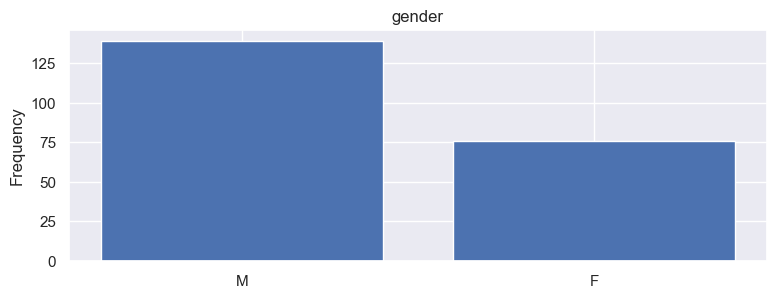

gender:
gender
M    139
F     76
Name: count, dtype: int64


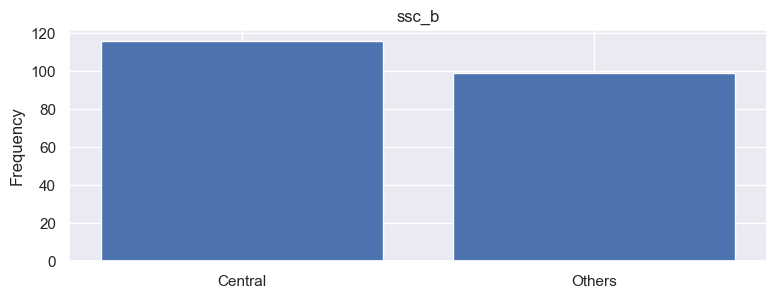

ssc_b:
ssc_b
Central    116
Others      99
Name: count, dtype: int64


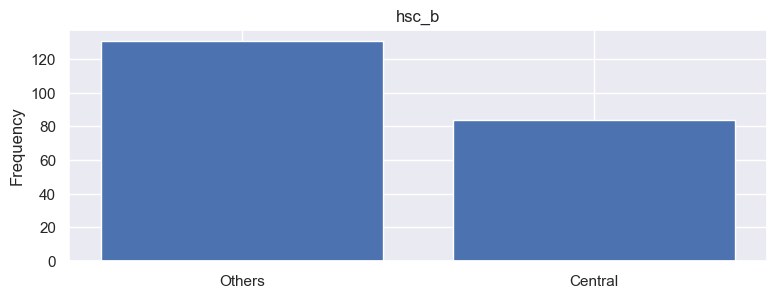

hsc_b:
hsc_b
Others     131
Central     84
Name: count, dtype: int64


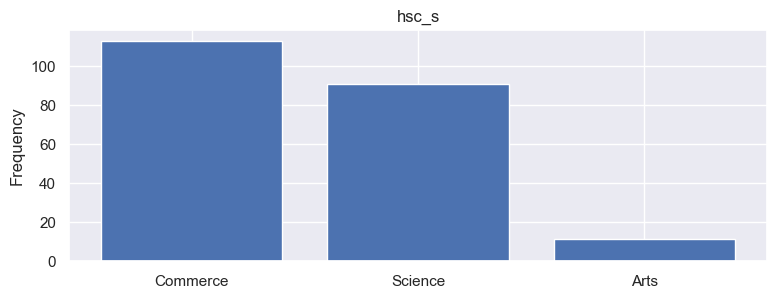

hsc_s:
hsc_s
Commerce    113
Science      91
Arts         11
Name: count, dtype: int64


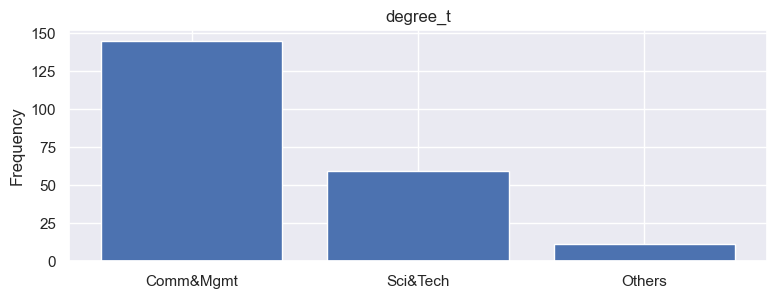

degree_t:
degree_t
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: count, dtype: int64


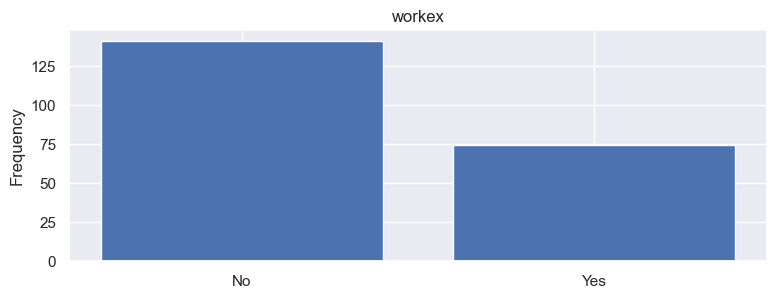

workex:
workex
No     141
Yes     74
Name: count, dtype: int64


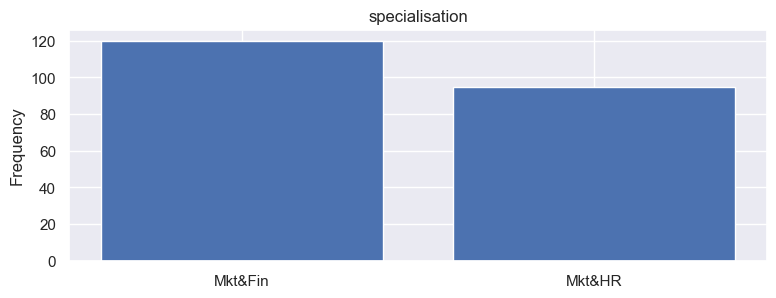

specialisation:
specialisation
Mkt&Fin    120
Mkt&HR      95
Name: count, dtype: int64


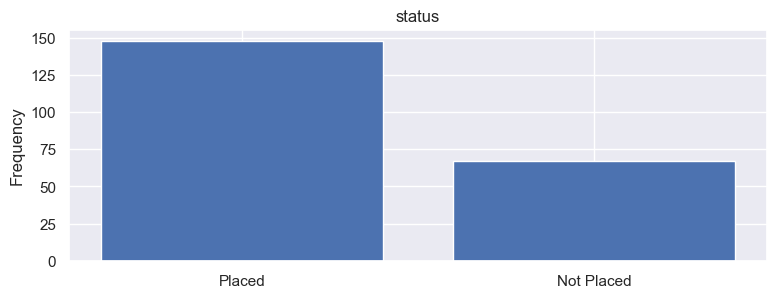

status:
status
Placed        148
Not Placed     67
Name: count, dtype: int64


In [18]:
sns.set_style('darkgrid')
for c in categorical_list:
    bar_plot(c)

<a id="6"></a> 
### Numerical Variables

In [19]:
numerical_float64 = (dataset.dtypes == "float64")
numerical_float64_list = list(numerical_float64[numerical_float64].index)

print("Numerical variables:")
print(numerical_float64_list)

Numerical variables:
['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']


In [20]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(dataset[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} Distribution with Histogram".format(variable))
    plt.show()

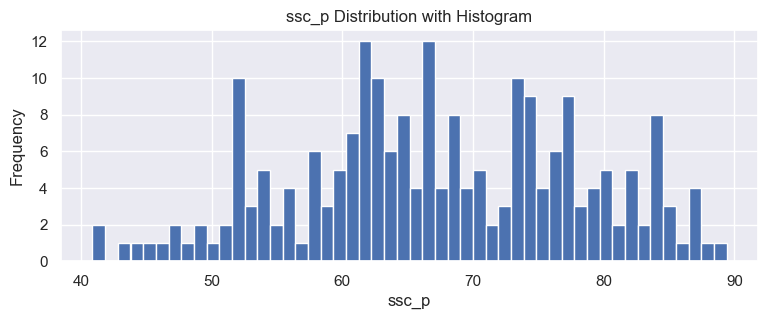

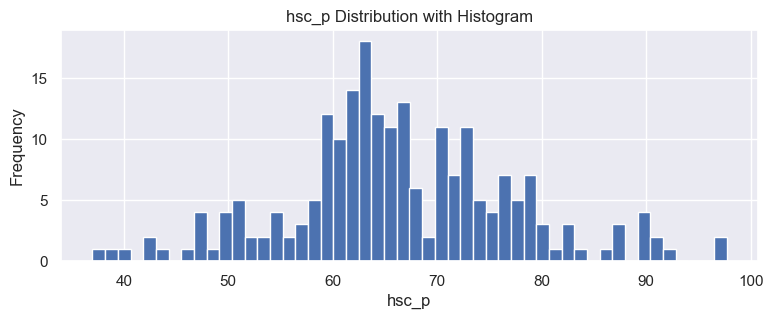

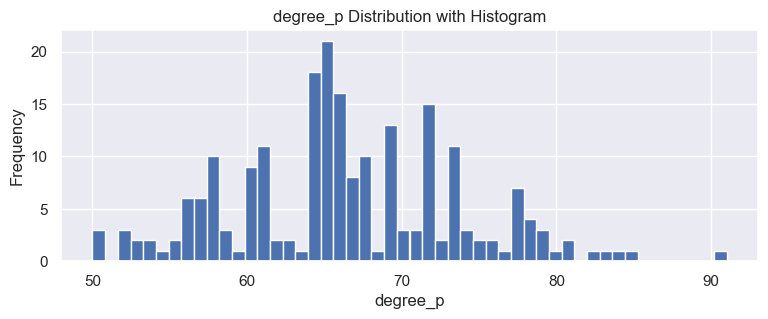

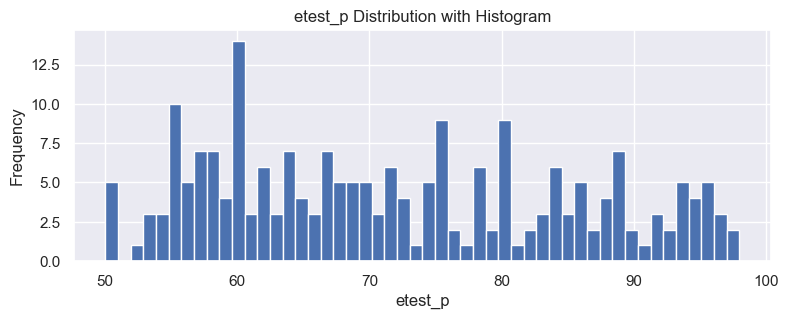

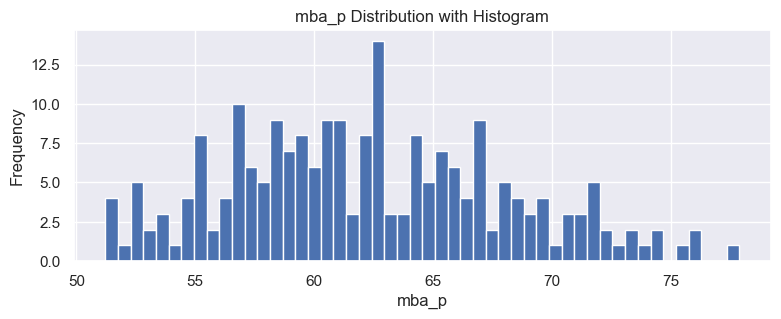

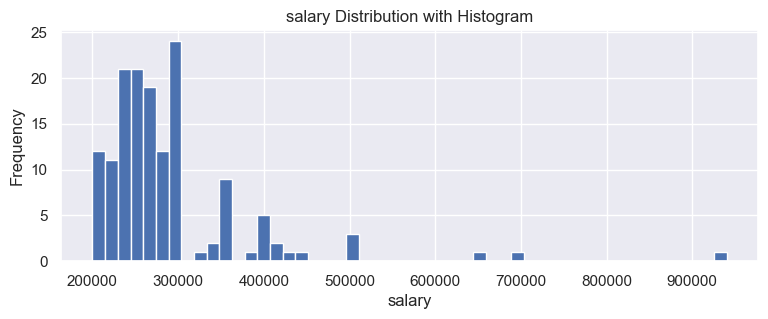

In [21]:
for n in numerical_float64_list:
    plot_hist(n)

Text(0.5, 1.0, 'salary Interval and Counts')

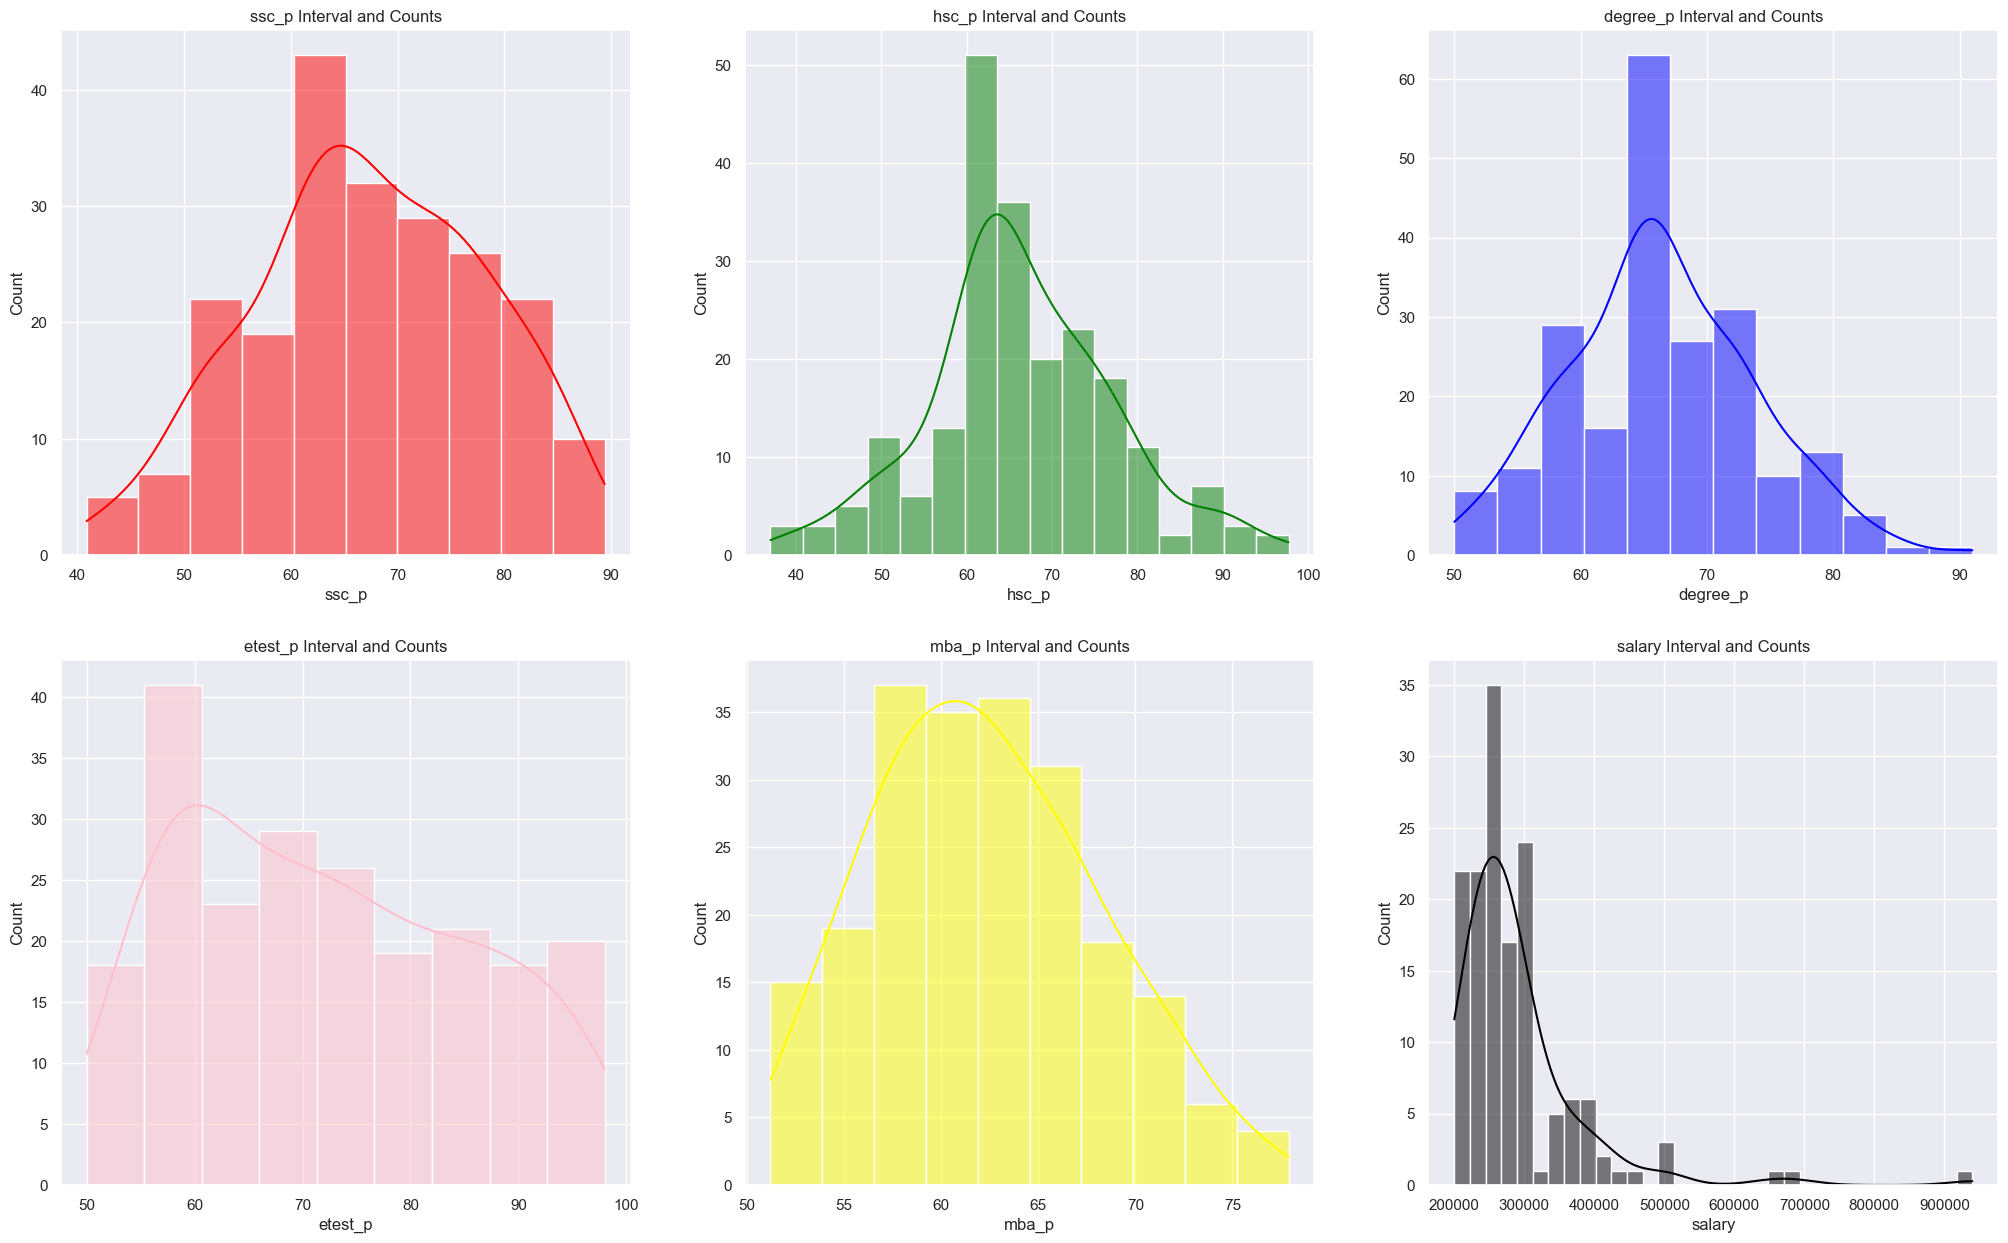

In [22]:
plt.figure(figsize=(25,15))

plt.subplot(2,3,1)
sns.histplot(dataset['ssc_p'], color = 'red', kde = True).set_title('ssc_p Interval and Counts')

plt.subplot(2,3,2)
sns.histplot(dataset['hsc_p'], color = 'green', kde = True).set_title('hsc_p Interval and Counts')

plt.subplot(2,3,3)
sns.histplot(dataset['degree_p'], kde = True, color = 'blue').set_title('degree_p Interval and Counts')

plt.subplot(2,3,4)
sns.histplot(dataset['etest_p'], kde = True, color = 'pink').set_title('etest_p Interval and Counts')

plt.subplot(2,3,5)
sns.histplot(dataset['mba_p'], kde = True, color = 'yellow').set_title('mba_p Interval and Counts')

plt.subplot(2,3,6)
sns.histplot(dataset['salary'], kde = True, color = 'black').set_title('salary Interval and Counts')

<Axes: xlabel='status', ylabel='salary'>

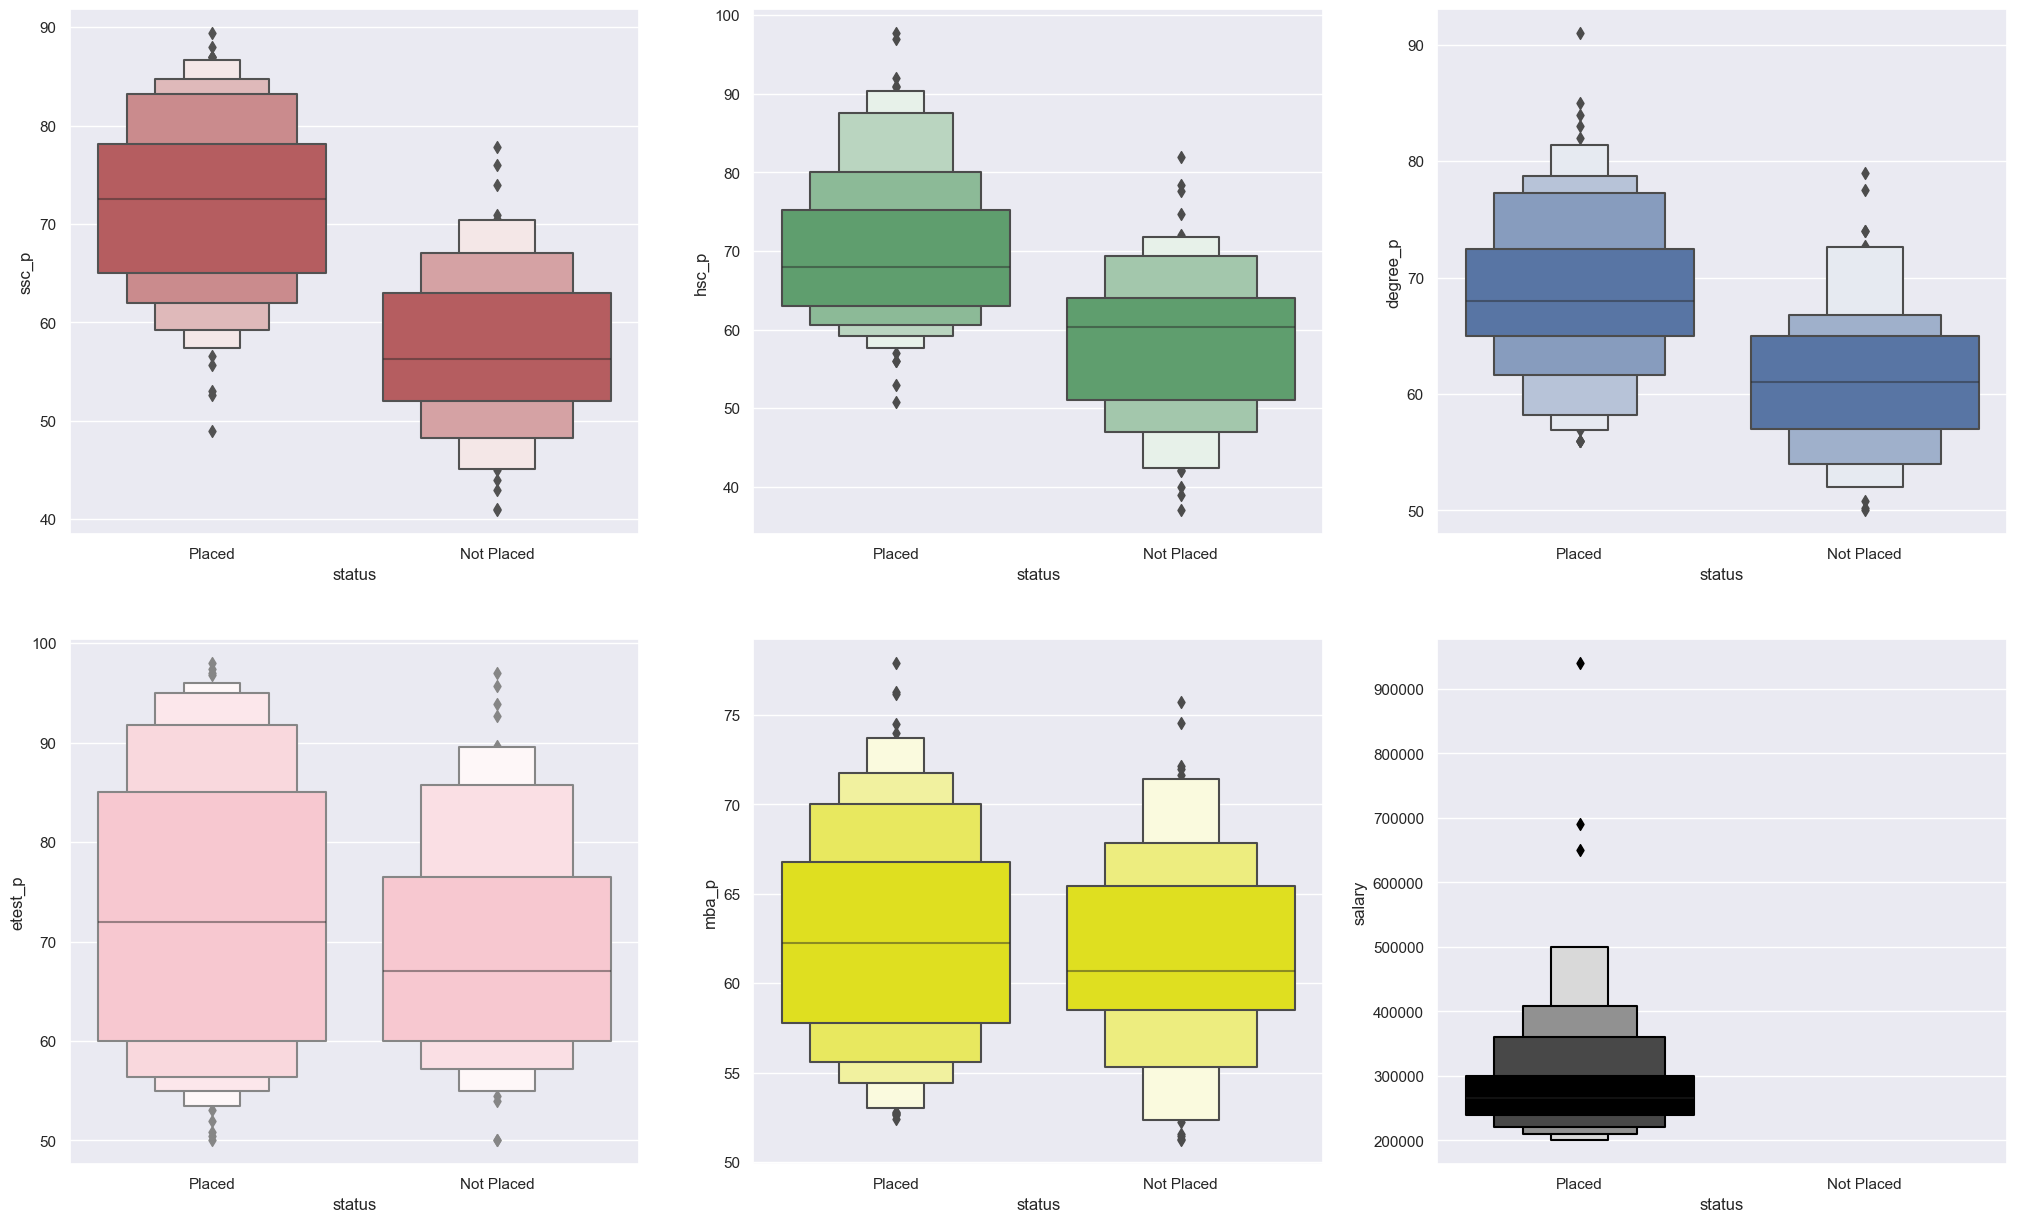

In [23]:
plt.figure(figsize=(25,15))

plt.subplot(2,3,1)
sns.boxenplot(x=dataset['status'], y=dataset['ssc_p'],
              color="r", 
              scale="linear", data=dataset)

plt.subplot(2,3,2)
sns.boxenplot(x=dataset['status'], y=dataset['hsc_p'],
              color="g", 
              scale="linear", data=dataset)

plt.subplot(2,3,3)
sns.boxenplot(x=dataset['status'], y=dataset['degree_p'],
              color="b", 
              scale="linear", data=dataset)

plt.subplot(2,3,4)
sns.boxenplot(x=dataset['status'], y=dataset['etest_p'],
              color="pink", 
              scale="linear", data=dataset)

plt.subplot(2,3,5)
sns.boxenplot(x=dataset['status'], y=dataset['mba_p'],
              color="yellow", 
              scale="linear", data=dataset)

plt.subplot(2,3,6)
sns.boxenplot(x=dataset['status'], y=dataset['salary'],
              color="black", 
              scale="linear", data=dataset)